In [56]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from tqdm import tqdm
import torch
import torchvision
import torchvision.datasets as datasets
import torch.optim as optim
from torch.autograd import Variable
import torchvision.transforms as transforms

## Problem 1

In [92]:
class MLP(nn.Module):

    def __init__(self):
        super(MLP, self).__init__() #not sure if this is needed, saw it here: https://nextjournal.com/gkoehler/pytorch-mnist
        self.engine = nn.Sequential(
                nn.Linear(784,512), #each image is 28x28 pixels
                nn.ReLU(),
                nn.Linear(512,256),
                nn.ReLU(),
                nn.Linear(256, 256),
                nn.ReLU(),
                nn.Linear(256, 10)
        )

    def forward(self, x):
        # fill out your forward function
        #print(x)
        return self.engine(x)

#net = MLP()
asfd =np.array([[1,2,3],[5,6,7]])
np.average(asfd[-2:],axis=0)


array([3., 4., 5.])

In [58]:
# adapted from: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(.5, .5)])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=2)

classes = list(range(10))

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# get some random training images
dataiter = iter(trainloader)

# images, labels = dataiter.next()

# # show images
# imshow(torchvision.utils.make_grid(images))
# # print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [95]:
net_A = MLP()

criterion_A = nn.CrossEntropyLoss()
# Input: (N,C) where C = number of classes
# Target: (N) where each value is 0 <= targets[i] <= C-1
# Output: scalar. If reduce is False, then (N) instead.
optimizer_A = optim.SGD(net_A.parameters(), lr=0.001, momentum=0.9)
losses_A = []
var_A = [] #np.zeros(60000/200,4) #60k training samples, recording variance every 200 samples
all_vars = []
accuracy_A = []
print(var_A)
for epoch in range(1):
    running_loss =0.0
    for i, data in enumerate(trainloader,0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #note inputs is a 4D tensor nSamples_in_batch x nChannels x Height x Width.
        #you can change the nSamples_in_batch in the train an testloader code
        #print(labels)
        # zero the parameter gradients
        optimizer_A.zero_grad()
        
        #forward + backward + optimize
        outputs = net_A(inputs.flatten())
        #print(outputs.unsqueeze(0).size())
        loss = criterion_A(outputs.unsqueeze(0), labels) #the unsqueeze adds back the nSamples_in_batch dimension
        loss.backward()
        optimizer_A.step()
        
        # print statistics
        running_loss += loss.item()
        
        var = []
        for l in [0,2,4,6]:
            var.append(torch.var(net_A.engine[l].weight.grad).item())
        all_vars.append(var)
        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            losses_A.append(running_loss / 200)
            running_loss = 0.0
#             var = []
#             for l in [0,2,4,6]:
#                 var.append(torch.var(net_A.engine[l].weight.grad).item())
            avg_var = np.average(np.array(all_vars[-200:]),axis=0)
            print("Variance:", avg_var)
            var_A.append(avg_var)
           # accuracy_A.append(test_model(net_A))

[]
[1,   200] loss: 2.276
Variance: [8.05509596e-06 1.54815193e-05 1.97370742e-05 6.35417211e-04]
[1,   400] loss: 2.134
Variance: [2.29350406e-05 4.45600373e-05 6.61170364e-05 2.34325439e-03]
[1,   600] loss: 1.769
Variance: [7.57280178e-05 1.17663346e-04 1.88711105e-04 7.91415458e-03]
[1,   800] loss: 1.222
Variance: [0.00016375 0.00019518 0.00029172 0.01254224]
[1,  1000] loss: 1.222
Variance: [0.00024084 0.00023505 0.00032063 0.01259638]
[1,  1200] loss: 0.937
Variance: [0.00022616 0.00020531 0.00027903 0.01000807]
[1,  1400] loss: 0.895
Variance: [0.00028891 0.00025668 0.00032556 0.01143695]
[1,  1600] loss: 0.922
Variance: [0.00026004 0.00024601 0.0003204  0.01050161]
[1,  1800] loss: 0.980
Variance: [0.00026382 0.00021502 0.00024932 0.00767653]
[1,  2000] loss: 0.835
Variance: [0.00022798 0.00019556 0.00023186 0.00766689]
[1,  2200] loss: 0.637
Variance: [0.00027637 0.00024953 0.00028497 0.00783075]
[1,  2400] loss: 0.797
Variance: [0.00034146 0.00030742 0.00037226 0.01028149]
[

[1, 20800] loss: 0.214
Variance: [0.00011547 0.00011865 0.00011104 0.00218507]
[1, 21000] loss: 0.392
Variance: [0.00023167 0.0002785  0.0003124  0.00510997]
[1, 21200] loss: 0.296
Variance: [0.00017287 0.000178   0.0001733  0.00278286]
[1, 21400] loss: 0.152
Variance: [6.21650830e-05 6.27518747e-05 5.59024076e-05 1.08176708e-03]
[1, 21600] loss: 0.248
Variance: [0.00012441 0.00014137 0.00015678 0.00268285]
[1, 21800] loss: 0.170
Variance: [0.00010942 0.00010427 0.00010394 0.00178792]
[1, 22000] loss: 0.290
Variance: [0.00019791 0.00017952 0.00019384 0.00327038]
[1, 22200] loss: 0.355
Variance: [0.00014914 0.00019654 0.0002108  0.00347148]
[1, 22400] loss: 0.253
Variance: [0.00012563 0.00014173 0.00013962 0.00191087]
[1, 22600] loss: 0.180
Variance: [9.16770203e-05 1.00162956e-04 1.01826071e-04 1.80548424e-03]
[1, 22800] loss: 0.222
Variance: [1.14788278e-04 1.06902180e-04 9.83920592e-05 1.51861761e-03]
[1, 23000] loss: 0.323
Variance: [0.00011999 0.00013068 0.00013691 0.00207178]
[1, 

[1, 40600] loss: 0.211
Variance: [0.00014377 0.00015153 0.00018627 0.00284177]
[1, 40800] loss: 0.141
Variance: [9.30446833e-05 1.17239274e-04 1.29452693e-04 2.21048211e-03]
[1, 41000] loss: 0.242
Variance: [0.00013788 0.00015689 0.00016498 0.00243515]
[1, 41200] loss: 0.251
Variance: [0.00011481 0.00013213 0.00013249 0.00248343]
[1, 41400] loss: 0.231
Variance: [0.00012369 0.00014326 0.00015536 0.00321137]
[1, 41600] loss: 0.152
Variance: [9.42301960e-05 1.05495432e-04 1.21638808e-04 2.10619177e-03]
[1, 41800] loss: 0.249
Variance: [0.00024393 0.00022199 0.00018309 0.00253047]
[1, 42000] loss: 0.278
Variance: [0.0001623  0.00017356 0.00018307 0.00347581]
[1, 42200] loss: 0.334
Variance: [0.00014065 0.00017076 0.00017263 0.00297035]
[1, 42400] loss: 0.096
Variance: [7.20626636e-05 8.09262327e-05 8.86132074e-05 1.44330713e-03]
[1, 42600] loss: 0.263
Variance: [0.00020833 0.00020047 0.00022999 0.00375847]
[1, 42800] loss: 0.201
Variance: [0.00017026 0.00019279 0.00018423 0.00261171]
[1, 

KeyboardInterrupt: 

In [43]:
#B. Cosine Annealing learning rate
net_B = MLP()
criterion_B = nn.CrossEntropyLoss()
optimizer_B = optim.SGD(net_B.parameters(), lr=.001, momentum=0.9)
losses_B = []
error_b = []
T_max = .1
scheduler_B = optim.lr_scheduler.CosineAnnealingLR(optimizer_B, T_max, last_epoch=-1)

for epoch in range(1):
    running_loss =0.0
    for i, data in enumerate(trainloader,0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #note inputs is a 4D tensor nSamples_in_batch x nChannels x Height x Width.
        #you can change the nSamples_in_batch in the train an testloader code

        # zero the parameter gradients
        optimizer_B.zero_grad()
        
        #forward + backward + optimize
        outputs = net_B(inputs.flatten())
        #print(outputs.unsqueeze(0).size())
        loss = criterion_B(outputs.unsqueeze(0), labels) #the unsqueeze adds back the nSamples_in_batch dimension
        loss.backward()
        optimizer_B.step()
        scheduler_B.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            losses_B.append(running_loss/200)
            error_B.append(100 - test_model(net_B))
            running_loss = 0.0

[1,   200] loss: 2.263
[1,   400] loss: 2.088
[1,   600] loss: 1.618
[1,   800] loss: 1.268
[1,  1000] loss: 1.121
[1,  1200] loss: 0.897
[1,  1400] loss: 0.805
[1,  1600] loss: 0.949
[1,  1800] loss: 0.801
[1,  2000] loss: 0.835
[1,  2200] loss: 0.705
[1,  2400] loss: 0.629
[1,  2600] loss: 0.648
[1,  2800] loss: 0.697
[1,  3000] loss: 0.767
[1,  3200] loss: 0.657
[1,  3400] loss: 0.681
[1,  3600] loss: 0.497
[1,  3800] loss: 0.548
[1,  4000] loss: 0.689
[1,  4200] loss: 0.759
[1,  4400] loss: 0.599
[1,  4600] loss: 0.676
[1,  4800] loss: 0.570
[1,  5000] loss: 0.364
[1,  5200] loss: 0.496
[1,  5400] loss: 0.512
[1,  5600] loss: 0.555
[1,  5800] loss: 0.387
[1,  6000] loss: 0.466
[1,  6200] loss: 0.549
[1,  6400] loss: 0.453
[1,  6600] loss: 0.490
[1,  6800] loss: 0.575
[1,  7000] loss: 0.432
[1,  7200] loss: 0.526
[1,  7400] loss: 0.508
[1,  7600] loss: 0.504
[1,  7800] loss: 0.426
[1,  8000] loss: 0.500
[1,  8200] loss: 0.529
[1,  8400] loss: 0.470
[1,  8600] loss: 0.646
[1,  8800] 

In [44]:
#C. Step Decaying learning rate
net_C = MLP()
criterion_C = nn.CrossEntropyLoss()
optimizer_C = optim.SGD(net_C.parameters(), lr=.01, momentum=0.9)
losses_C = []
error_C = []

scheduler_C = torch.optim.lr_scheduler.StepLR(optimizer_C, step_size=100, gamma=0.9)
for epoch in range(1):
    running_loss =0.0
    for i, data in enumerate(trainloader,0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #note inputs is a 4D tensor nSamples_in_batch x nChannels x Height x Width.
        #you can change the nSamples_in_batch in the train an testloader code
        #print(labels)
        # zero the parameter gradients
        optimizer_C.zero_grad()
        
        #forward + backward + optimize
        outputs = net_C(inputs.flatten())
        #print(outputs.unsqueeze(0).size())
        loss = criterion_C(outputs.unsqueeze(0), labels) #the unsqueeze adds back the nSamples_in_batch dimension
        loss.backward()
        optimizer_C.step()
        
        scheduler_C.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            losses_C.append(running_loss/200)
            running_loss = 0.0
            error_C.append(test_model(net_C))

[1,   200] loss: 2.285
[1,   400] loss: 2.107
[1,   600] loss: 2.146
[1,   800] loss: 2.126
[1,  1000] loss: 1.927
[1,  1200] loss: 1.639
[1,  1400] loss: 1.507
[1,  1600] loss: 1.231
[1,  1800] loss: 1.011
[1,  2000] loss: 1.119
[1,  2200] loss: 0.927
[1,  2400] loss: 0.816
[1,  2600] loss: 0.828
[1,  2800] loss: 0.771
[1,  3000] loss: 0.780
[1,  3200] loss: 0.656
[1,  3400] loss: 0.609
[1,  3600] loss: 0.548
[1,  3800] loss: 0.533
[1,  4000] loss: 0.669
[1,  4200] loss: 0.480
[1,  4400] loss: 0.566
[1,  4600] loss: 0.513
[1,  4800] loss: 0.536
[1,  5000] loss: 0.520
[1,  5200] loss: 0.417
[1,  5400] loss: 0.543
[1,  5600] loss: 0.533
[1,  5800] loss: 0.570
[1,  6000] loss: 0.577
[1,  6200] loss: 0.490
[1,  6400] loss: 0.584
[1,  6600] loss: 0.577
[1,  6800] loss: 0.499
[1,  7000] loss: 0.676
[1,  7200] loss: 0.590
[1,  7400] loss: 0.570
[1,  7600] loss: 0.566
[1,  7800] loss: 0.454
[1,  8000] loss: 0.587
[1,  8200] loss: 0.611
[1,  8400] loss: 0.535
[1,  8600] loss: 0.459
[1,  8800] 

In [63]:
#test model
def test_model(net):
    correct = 0.0
    total = 0.0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images.flatten())
            #print(outputs,labels,torch.max(outputs,1))
            _, predicted = torch.max(outputs.data.unsqueeze(0), 1) #again unsqueeze to add back batch dimension
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc =  100.0 * correct / total
    print('Accuracy of the network on the 10000 test images: %d %%' % (
        acc))
    return acc
#test_model(net_A)

Text(0.5,1,'Convergence of Bg CTM')

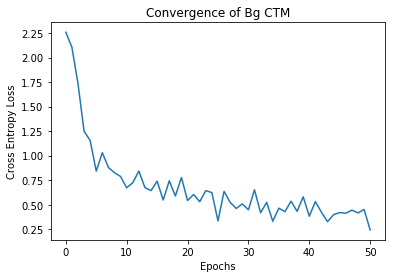

In [114]:
# l = [1.218]
# for i,val in enumerate(losses_A):
#     if i!=0 and i%2000 == 0:
#         l.append(sum(losses_A[-2000:])/2000)
loss
plt.figure()
plt.plot(losses_A)
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")
plt.title("Convergence of Bg CTM")

# plt.figure()
# plt.plot(losses_B)
# plt.xlabel("Batches of 200 Samples")
# plt.ylabel("Cross Entropy Loss")
# plt.title("Convergence of Cosine Anealing LR")

# plt.figure()
# plt.plot(losses_C)
# plt.xlabel("Batches of 200 Samples")
# plt.ylabel("Cross Entropy Loss")
# plt.title("Convergence of Step-Decaying LR")


In [39]:
# print(net_A.engine[0].weight.grad)
# for l in [0,2,4,6]:
#     var.append(torch.var(net_A.engine[l].weight.grad).item())
# var_A.append(var)
# print(var_A)

tensor([[0.0052, 0.0052, 0.0052,  ..., 0.0052, 0.0052, 0.0052],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0062, 0.0062, 0.0062,  ..., 0.0062, 0.0062, 0.0062],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0003, 0.0003]])
[[3.216395998606458e-05, 4.998841177439317e-05, 7.939775241538882e-05, 0.002048051916062832]]


Max Variance 0.0002784941170818766 
Min Variance 2.4069021423730302e-05
Max Variance 0.0003012422271816758 
Min Variance 2.3078324989063e-05
Max Variance 0.0004279109396935473 
Min Variance 2.0742843151225246e-05
Max Variance 0.007700157304747548 
Min Variance 0.0003670435271409234
[0.0002784941170818766, 0.0003012422271816758, 0.0004279109396935473, 0.007700157304747548] [2.4069021423730302e-05, 2.3078324989063e-05, 2.0742843151225246e-05, 0.0003670435271409234]
Layer 1:
	Clipping Level: 0.033376286017582996
	Stepsize: 6.0172553559325756e-06
12.0
Layer 2:
	Clipping Level: 0.034712662080668824
	Stepsize: 5.76958124726575e-06
13.0
Layer 3:
	Clipping Level: 0.04137201661478673
	Stepsize: 5.1857107878063114e-06
13.0
Layer 4:
	Clipping Level: 0.17550108039265797
	Stepsize: 9.176088178523085e-05
11.0


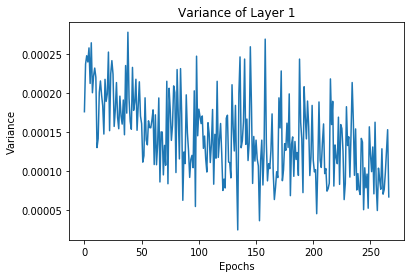

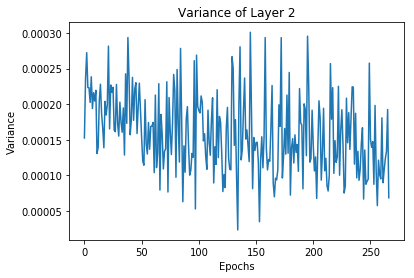

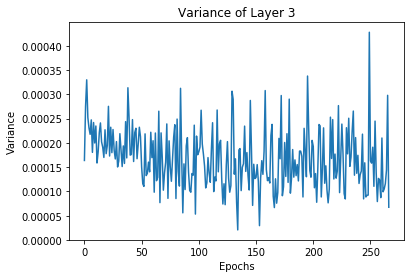

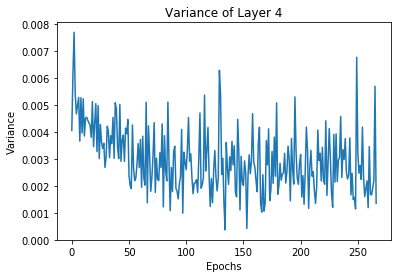

In [101]:
# print(np.array(var_A).transpose())
var_A = var_A[10:]
max_var = []
min_var = []
for i in range(4):
    vals = np.array(var_A).transpose()[i]
    plt.figure()
    plt.plot(vals)
    plt.title('Variance of Layer %d' % (i+1))
    plt.xlabel("Epochs")
    plt.ylabel("Variance")
    print("Max Variance", max(vals), "\nMin Variance",min(vals))
    max_var.append(max(vals))
    min_var.append(min(vals))
#this was determined before
#for layers [0,1,2,3]
#max_var = [0.004044899716973305, 0.005807420704513788, 0.005409634206444025, 0.10222090780735016]
#min_var = [6.31305380873813e-19, 2.521960777520568e-18, 9.78722913186825e-18, 2.851006756641772e-16]
print(max_var,min_var)
for idx,maxv in enumerate(max_var):
    cl = 2*np.sqrt(maxv) #clipping lvl
    ss = min_var[idx]/4 #step size
    Bwg= np.log2(cl/ss)
    print("Layer %d:" % (idx+1))
    print("\tClipping Level:",2*np.sqrt(maxv))
    print("\tStepsize:",min_var[idx]/4)
    print(round(Bwg))

In [66]:
## 1.3

[0.004044899716973305, 0.005807420704513788, 0.005409634206444025, 0.10222090780735016] [6.31305380873813e-19, 2.521960777520568e-18, 9.78722913186825e-18, 2.851006756641772e-16]


In [113]:
#same thing as above, but now we are quantizing gradients before backprop
def quantizeWeight(W,BW):
    #print(W,BW)
    Wq = np.minimum(np.round(W*np.power(2.0,BW-1.0))*np.power(2.0,1.0-BW),1.0-np.power(2.0,1.0-BW))
    return Wq

net_A = MLP()

criterion_A = nn.CrossEntropyLoss()
# Input: (N,C) where C = number of classes
# Target: (N) where each value is 0 <= targets[i] <= C-1
# Output: scalar. If reduce is False, then (N) instead.
optimizer_A = optim.SGD(net_A.parameters(), lr=0.001, momentum=0.9)
losses_A = []
var_A = [] #np.zeros(60000/200,4) #60k training samples, recording variance every 200 samples
all_vars = []
accuracy_A = []
print(var_A)
for epoch in range(1):
    running_loss =0.0
    for i, data in enumerate(trainloader,0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #note inputs is a 4D tensor nSamples_in_batch x nChannels x Height x Width.
        #you can change the nSamples_in_batch in the train an testloader code
        #print(labels)
        # zero the parameter gradients
        optimizer_A.zero_grad()
        
        #forward + backward + optimize
        outputs = net_A(inputs.flatten())
        
        
        #print(outputs.unsqueeze(0).size())
        loss = criterion_A(outputs.unsqueeze(0), labels) #the unsqueeze adds back the nSamples_in_batch dimension
        loss.backward()
        optimizer_A.step()

        ##QUANTIZE GRADIENTS!
        BW = 12
        for l in [0,2,4,6]:
            net_A.engine[l].weight.grad = quantizeWeight(net_A.engine[l].weight.grad, BW)
        
        # print statistics
        running_loss += loss.item()
        
#         var = []
#         for l in [0,2,4,6]:
#             var.append(torch.var(net_A.engine[l].weight.grad).item())
        #all_vars.append(var)
        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            losses_A.append(running_loss / 200)
            running_loss = 0.0
#             var = []
#             for l in [0,2,4,6]:
#                 var.append(torch.var(net_A.engine[l].weight.grad).item())
            #avg_var = np.average(np.array(all_vars[-200:]),axis=0)
            #print("Variance:", avg_var)
            #var_A.append(avg_var)
           # accuracy_A.append(test_model(net_A))

[]
[1,   200] loss: 2.258
[1,   400] loss: 2.105
[1,   600] loss: 1.736
[1,   800] loss: 1.249
[1,  1000] loss: 1.154
[1,  1200] loss: 0.843
[1,  1400] loss: 1.030
[1,  1600] loss: 0.880
[1,  1800] loss: 0.826
[1,  2000] loss: 0.787
[1,  2200] loss: 0.672
[1,  2400] loss: 0.724
[1,  2600] loss: 0.843
[1,  2800] loss: 0.675
[1,  3000] loss: 0.643
[1,  3200] loss: 0.740
[1,  3400] loss: 0.548
[1,  3600] loss: 0.744
[1,  3800] loss: 0.589
[1,  4000] loss: 0.778
[1,  4200] loss: 0.543
[1,  4400] loss: 0.604
[1,  4600] loss: 0.530
[1,  4800] loss: 0.644
[1,  5000] loss: 0.623
[1,  5200] loss: 0.334
[1,  5400] loss: 0.636
[1,  5600] loss: 0.524
[1,  5800] loss: 0.462
[1,  6000] loss: 0.508
[1,  6200] loss: 0.448
[1,  6400] loss: 0.652
[1,  6600] loss: 0.418
[1,  6800] loss: 0.524
[1,  7000] loss: 0.331
[1,  7200] loss: 0.465
[1,  7400] loss: 0.429
[1,  7600] loss: 0.536
[1,  7800] loss: 0.433
[1,  8000] loss: 0.581
[1,  8200] loss: 0.383
[1,  8400] loss: 0.531
[1,  8600] loss: 0.423
[1,  880

KeyboardInterrupt: 

In [53]:
#actually don't think we need this precision profiler!

class GradCollect:
    inputs_grad_collect = []
    weight_grad_collect = []
    bias_grad_collect = []

    weight_range_collect = []
    bias_range_collect = []
    activation_range_collect = []
    activation_range_collect_temp = []

    NUM_COMPUTE_LAYERS = 0
    @classmethod
    def retain_model_grad(cls, model):
        def retain_module_grad(nn_module):
            if isinstance(nn_module, nn.Conv2d) or isinstance(nn_module, nn.Linear):
                print('registering weight parameters of {} layer'.format(nn_module._get_name()))
                nn_module.weight.requires_grad_(True)
                weight_stats = np.power(2.0, np.ceil(np.log2(np.amax(np.absolute(nn_module.weight.data.cpu().numpy())))))
                GradCollect.weight_grad_collect.append((nn_module._get_name(), nn_module.weight))
                GradCollect.weight_range_collect.append((nn_module._get_name(), weight_stats))

        model.apply(retain_module_grad)
        GradCollect.NUM_COMPUTE_LAYERS = len(GradCollect.weight_grad_collect)
        GradCollect.activation_range_collect = np.zeros(GradCollect.NUM_COMPUTE_LAYERS)

    @classmethod
    def retain_inputs_grad(cls, model):
        def retain_nn_module_inputs(m):
            def retain_inputs(m, x):
                x = x[0]
                x = x.requires_grad_(True)
                if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                    stats = np.power(2.0,np.ceil(np.log2(np.amax(np.absolute(x.detach().cpu().numpy())))))
                    GradCollect.inputs_grad_collect.append((m._get_name(), x))
                    GradCollect.activation_range_collect_temp.append((m._get_name(), stats))
                    x.retain_grad()

            m.register_forward_pre_hook(retain_inputs)

        model.apply(retain_nn_module_inputs)


def get_noise_gains(model, data_loader, device):
    weight_gains = [0] * GradCollect.NUM_COMPUTE_LAYERS
    activation_gains = [0] * GradCollect.NUM_COMPUTE_LAYERS
    data_size = len(data_loader)
    first_time = True
    for inputs, targets in tqdm(data_loader):
        inputs = inputs.to(device).requires_grad_(True)
        GradCollect.inputs_grad_collect = []
        GradCollect.activation_range_collect_temp = []
        inputs.retain_grad()
        outputs = model(inputs)
        outputs = outputs.sum(0)

        GradCollect.activation_range_collect = np.vstack([
            np.array([num for _, num in GradCollect.activation_range_collect_temp]),
            GradCollect.activation_range_collect]
        ).max(0)

        Z_fl, Y_fl = outputs.max(0)
        num_lbls = outputs.size(0)
        for i in range(num_lbls):
            if i != Y_fl:
                output_difference = Z_fl - outputs[i]
                output_difference.backward(retain_graph=True)
                with torch.no_grad():
                    denominator = 24 * (output_difference ** 2)
                    for idx in range(GradCollect.NUM_COMPUTE_LAYERS):
                        weight = GradCollect.weight_grad_collect[idx][1]
                        weight_grad = weight.grad
                        if first_time:
                            weight_gains[idx] = (weight_grad ** 2).sum() / denominator
                        else:
                            weight_gains[idx].add_((weight_grad ** 2).sum() / denominator)

                        weight.grad.zero_()

                    for idx, (module_name, activations) in enumerate(GradCollect.inputs_grad_collect):
                        grad = activations.grad
                        if first_time:
                            activation_gains[idx] = (grad ** 2).sum() / denominator
                        else:
                            activation_gains[idx].add_((grad ** 2).sum() / denominator)

                        activations.grad.zero_()

                    first_time = False

    for idx in range(GradCollect.NUM_COMPUTE_LAYERS):
        activation_gains[idx] = activation_gains[idx].cpu().numpy() / data_size
        weight_gains[idx] = weight_gains[idx].cpu().numpy() / data_size

    return weight_gains, activation_gains


def get_normalized_noise_gains(wg_coarse, ag_coarse):
    adjusted_wg_noise_gains = np.zeros(GradCollect.NUM_COMPUTE_LAYERS)
    adjusted_ag_noise_gains = np.zeros(GradCollect.NUM_COMPUTE_LAYERS)

    for l in range(GradCollect.NUM_COMPUTE_LAYERS):
        adjusted_wg_noise_gains[l] = wg_coarse[l] * np.square(GradCollect.weight_range_collect[l][1])
        adjusted_ag_noise_gains[l] = ag_coarse[l] * np.square(GradCollect.activation_range_collect[l])

    min_ag = adjusted_ag_noise_gains.min()
    min_wg = adjusted_wg_noise_gains.min()

    least_gain = min(min_ag,min_wg)
    return adjusted_wg_noise_gains, adjusted_ag_noise_gains, least_gain


def get_precision_offsets(wg, ag, least_gain):
    w_offsets = np.zeros(GradCollect.NUM_COMPUTE_LAYERS)
    a_offsets = np.zeros(GradCollect.NUM_COMPUTE_LAYERS)

    for l in range(GradCollect.NUM_COMPUTE_LAYERS):
        w_offsets[l] = np.round(0.5 * np.log2(wg[l] / least_gain))
        a_offsets[l] = np.round(0.5 * np.log2(ag[l] / least_gain))

    return w_offsets, a_offsets

def compute_precision_offsets():
    #device = 'cuda'
    #print('using device:', device)
#     trainset, testset = get_datasets(root='./data', download=True)
#     trainloader, testloader = get_dataloaders(trainset, testset, batch_size=500, num_worker=32)

#     model_src_path = 'model.tar'
#     model = get_model(model_src_path, device)
    model = MLP()

    #model = model.to(device)
    GradCollect.retain_model_grad(model)
    GradCollect.retain_inputs_grad(model)

    wg, ag = get_noise_gains(model, trainloader, device='cpu')
    wg, ag, least_gain = get_normalized_noise_gains(wg, ag)
    print(GradCollect.weight_range_collect)
    print(GradCollect.activation_range_collect)
    w_offsets, a_offsets = get_precision_offsets(wg, ag, least_gain)
    print(w_offsets, a_offsets)
    np.save(arr=w_offsets,file='weight_offsets.npy')
    np.save(arr=a_offsets,file='activation_offsets.npy')
    np.save(arr=GradCollect.activation_range_collect, file='activation_dynamic_range.npy')
    np.save(arr=np.array([v for k, v in precision_profiler.GradCollect.weight_range_collect]), file='weight_dynamic_range.npy')

compute_precision_offsets()

  0%|                                                                                        | 0/60000 [00:00<?, ?it/s]

registering weight parameters of Linear layer
registering weight parameters of Linear layer
registering weight parameters of Linear layer
registering weight parameters of Linear layer


100%|████████████████████████████████████████████████████████████████████████████| 60000/60000 [52:02<00:00, 19.21it/s]

[('Linear', 0.0625), ('Linear', 0.0625), ('Linear', 0.0625), ('Linear', 0.0625)]
[1.  4.  2.  0.5]
[1. 1. 1. 1.] [0. 3. 3. 3.]


NameError: name 'precision_profiler' is not defined

In [54]:
np.save(arr=np.array([v for k, v in GradCollect.weight_range_collect]), file='weight_dynamic_range.npy')

In [80]:
wdr = np.load("weight_dynamic_range.npy")
adr = np.load("activation_dynamic_range.npy")
w_off = np.load("weight_offsets.npy")
a_off = np.load("activation_offsets.npy")
print(wdr,adr,w_off,a_off)

[0.0625 0.0625 0.0625 0.0625] [1.  4.  2.  0.5] [1. 1. 1. 1.] [0. 3. 3. 3.]


## Problem 3.2

In [40]:
#we assume w is given as (nSamples,channels,H,W), where H,W is the 2d feature map
#for 2d convultion the normalization is taken across the channels, since filterweights are shared across the features.
#helps explain BN in conv: https://stackoverflow.com/questions/38553927/batch-normalization-in-convolutional-neural-network

def find_w_b(w,gamma,beta,mu,std,epsilon):
    #reshapes w_scalar to apply accross channels
    w_scalar = gamma/np.sqrt(std**2 + epsilon)
    return w*w_scalar.reshape(1,-1,1,1), beta - mu/np.sqrt(std**2 + epsilon)

#Example:
w = np.ones((2,4,2,2))
gamma = np.array([1,2,3,4])
beta = np.ones(4)*3
mu = np.ones(4)*2
std = np.ones(4)*4
epsilon = np.ones(4)*84

w_hat, b = find_w_b(w,gamma,beta,mu,std,epsilon)
print("w_hat:\n",w_hat)
print("b:\n",b)

w_hat:
 [[[[0.1 0.1]
   [0.1 0.1]]

  [[0.2 0.2]
   [0.2 0.2]]

  [[0.3 0.3]
   [0.3 0.3]]

  [[0.4 0.4]
   [0.4 0.4]]]


 [[[0.1 0.1]
   [0.1 0.1]]

  [[0.2 0.2]
   [0.2 0.2]]

  [[0.3 0.3]
   [0.3 0.3]]

  [[0.4 0.4]
   [0.4 0.4]]]]
b:
 [2.8 2.8 2.8 2.8]


In [7]:
class MLP_BN(nn.Module):

    def __init__(self):
        super(MLP_BN, self).__init__() #not sure if this is needed, saw it here: https://nextjournal.com/gkoehler/pytorch-mnist
        self.engine = nn.Sequential(
                nn.Linear(784,512), #each image is 28x28 pixels
                #nn.BatchNorm1d(512),
                nn.ReLU(),
                nn.Linear(512,256),
                #nn.BatchNorm1d(256),
                nn.ReLU(),
                nn.Linear(256, 256),
                #nn.BatchNorm1d(256),
                nn.ReLU(),
                nn.Linear(256, 10)
        )

    def forward(self, x):
        # fill out your forward function
        #print(x)
        return self.engine(x)
    


In [8]:
# adapted from: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(.5, .5)])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=5,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=5,
                                         shuffle=False, num_workers=2)

classes = list(range(10))

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# get some random training images
dataiter = iter(trainloader)

In [9]:
net_BN = MLP_BN()

criterion_BN = nn.CrossEntropyLoss()
# Input: (N,C) where C = number of classes
# Target: (N) where each value is 0 <= targets[i] <= C-1
# Output: scalar. If reduce is False, then (N) instead.
optimizer_BN = optim.SGD(net_BN.parameters(), lr=0.001, momentum=0.9)
losses_BN = []

for epoch in range(1):
    running_loss =0.0
    for i, data in enumerate(trainloader,0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #note inputs is a 4D tensor nSamples_in_batch x nChannels x Height x Width.
        #you can change the nSamples_in_batch in the train an testloader code
        #print(inputs.size(),inputs)

        # zero the parameter gradients
        optimizer_BN.zero_grad()
        
        #forward + backward + optimize
        outputs = net_BN(inputs.view(-1,784))
        #print(outputs.unsqueeze(0).size())
        loss = criterion_BN(outputs, labels) #the unsqueeze adds back the nSamples_in_batch dimension
        loss.backward()
        optimizer_BN.step()
        
        # print statistics
        running_loss += loss.item()
        
        if i % 40 == 39:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 40))
            losses_BN.append(running_loss / 40)
            running_loss = 0.0

[1,    40] loss: 2.297
[1,    80] loss: 2.274
[1,   120] loss: 2.279
[1,   160] loss: 2.247
[1,   200] loss: 2.195
[1,   240] loss: 2.180
[1,   280] loss: 2.125
[1,   320] loss: 2.070
[1,   360] loss: 1.965
[1,   400] loss: 1.776
[1,   440] loss: 1.583
[1,   480] loss: 1.492
[1,   520] loss: 1.207
[1,   560] loss: 1.191
[1,   600] loss: 1.062
[1,   640] loss: 0.896
[1,   680] loss: 0.977
[1,   720] loss: 0.818
[1,   760] loss: 0.777
[1,   800] loss: 0.723
[1,   840] loss: 0.660
[1,   880] loss: 0.578
[1,   920] loss: 0.567
[1,   960] loss: 0.495
[1,  1000] loss: 0.523
[1,  1040] loss: 0.645
[1,  1080] loss: 0.522
[1,  1120] loss: 0.642
[1,  1160] loss: 0.663
[1,  1200] loss: 0.580
[1,  1240] loss: 0.674
[1,  1280] loss: 0.534
[1,  1320] loss: 0.508
[1,  1360] loss: 0.467
[1,  1400] loss: 0.494
[1,  1440] loss: 0.551
[1,  1480] loss: 0.463
[1,  1520] loss: 0.377
[1,  1560] loss: 0.451
[1,  1600] loss: 0.550
[1,  1640] loss: 0.465
[1,  1680] loss: 0.436
[1,  1720] loss: 0.461
[1,  1760] 

Text(0.5,1,'Convergence without BatchNormalization')

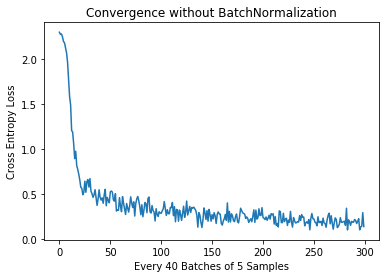

In [11]:
plt.figure()
plt.plot(losses_BN)
plt.xlabel("Every 40 Batches of 5 Samples")
plt.ylabel("Cross Entropy Loss")
#plt.title("Convergence with BatchNormalization")
plt.title("Convergence without BatchNormalization")

In [118]:
test = np.zeros((3,1,4,2))
test[1,0,:,:]=4
tensor = torch.tensor(test)

print(tensor)
print(tensor.view(3,8))

tensor([[[[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]]],


        [[[4., 4.],
          [4., 4.],
          [4., 4.],
          [4., 4.]]],


        [[[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]]]], dtype=torch.float64)
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [4., 4., 4., 4., 4., 4., 4., 4.],
        [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)
